<a href="https://colab.research.google.com/github/2303a51729Ajaykumar/machine-learning/blob/main/Project_8_Gold_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [2]:
gold_data=pd.read_csv('/content/gld_price_data.csv')

In [3]:
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [4]:
gold_data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [5]:
gold_data.shape

(2290, 6)

In [6]:
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [7]:
gold_data.isnull().sum()

,0
Date,0
SPX,0
GLD,0
USO,0
SLV,0
EUR/USD,0


In [8]:
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


Coorelation :
Positive
Negative


In [10]:
#dropping the data column
gold_data=gold_data.drop(['Date'],axis=1)

In [11]:
coorelation=gold_data.corr()

<Axes: >

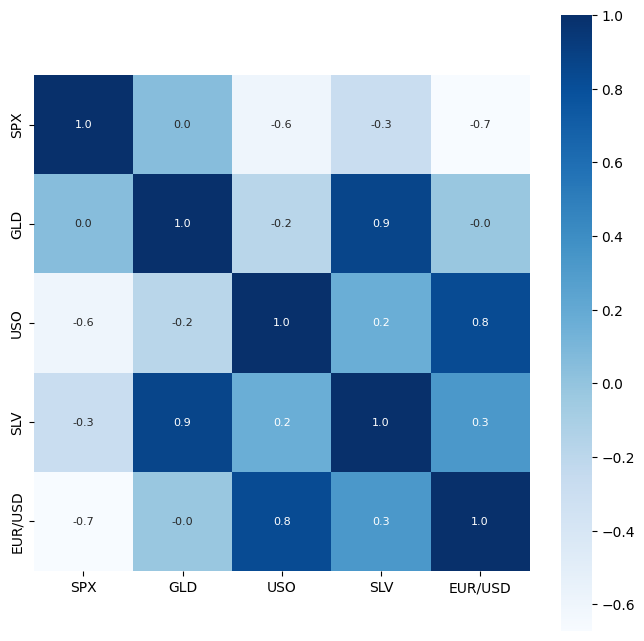

In [12]:
#constructing the heat map
plt.figure(figsize=(8,8))
sns.heatmap(coorelation,cbar=True,fmt='.1f',square=True,annot=True,annot_kws={'size':8},cmap='Blues')

In [13]:
print(coorelation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


<ipython-input-14-6290862f166a>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(gold_data['GLD'],color='green')


<Axes: xlabel='GLD', ylabel='Density'>

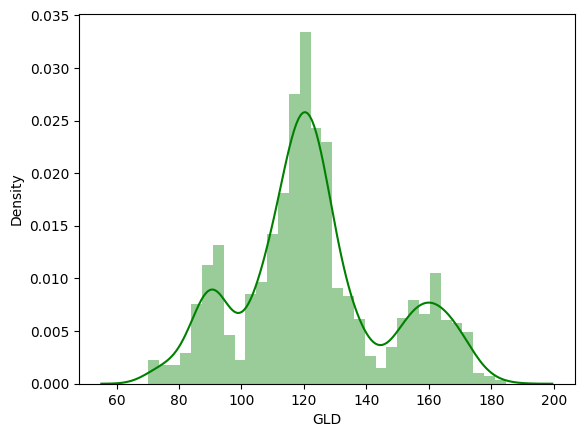

In [14]:
# check the distribution of the  GlD price
sns.distplot(gold_data['GLD'],color='green')

Splitting the features and target

In [15]:
X=gold_data.drop(['GLD'],axis=1)
Y=gold_data['GLD']

In [16]:
print(X)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [17]:
print(Y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


Training and testing the data

In [22]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=2)

In [23]:
print(X.shape,X_train.shape,X_test.shape)

(2290, 4) (1832, 4) (458, 4)


Model Training : Random Forest Regressor

In [24]:
Regressor=RandomForestRegressor(n_estimators=100)

In [25]:
Regressor.fit(X_train,Y_train)

RandomForestRegressor()

Model Evaluation

In [26]:
#prediction on test data
test_data_prediction=Regressor.predict(X_test)


In [27]:
print(test_data_prediction)

[168.31819901  81.94850004 116.17520049 127.69970082 120.77220128
 154.82259764 150.54589899 125.98690067 117.51629883 125.87900071
 116.66950083 171.01720123 141.86339847 167.71029789 115.17760006
 117.41770052 138.33270326 170.44560127 159.08800327 157.06189884
 155.12719991 125.25380044 175.57230003 157.54090319 125.22040052
  93.73319954  76.9258     120.60490019 119.0452992  167.49449994
  88.17690046 125.09870001  91.00110069 117.69220056 121.17619921
 136.31680076 115.3504014  114.90410088 147.95349927 107.04880096
 104.2807027   87.31089821 126.50100057 118.17410012 153.38569876
 119.56459987 108.41750019 107.88949775  93.1505005  127.11509803
  75.06040035 113.62189911 121.34750003 111.32529882 118.77779878
 120.6900995  158.88270128 167.66910202 146.86299665  86.02299881
  94.25340033  86.77399879  90.6002002  118.76140109 126.37700025
 127.6289     169.7693994  122.1945993  117.17629893  98.89220057
 168.52170093 142.8081986  131.92540246 121.21110211 121.98119934
 119.66140

In [28]:
#  R2 Error
error_score=metrics.r2_score(Y_test,test_data_prediction)
print("R squared error : ",error_score)

R squared error :  0.9888774933234068


compare the actual value with predicted value

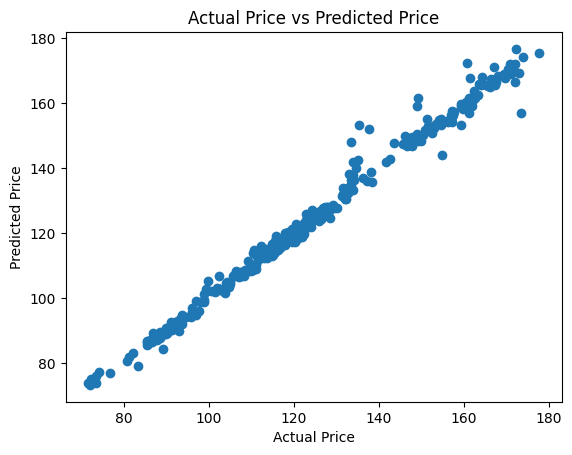

In [35]:
plt.scatter(Y_test,test_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Price vs Predicted Price")
plt.show()

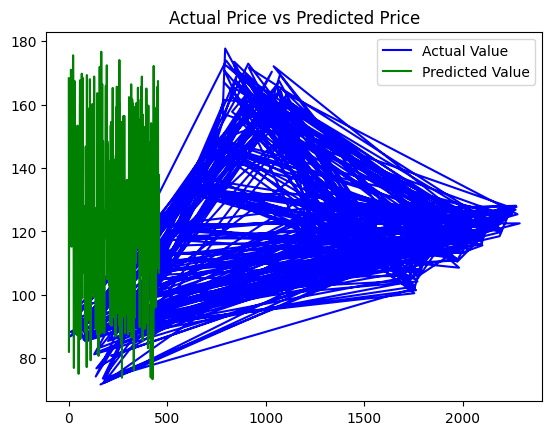

In [37]:
plt.plot(Y_test,color='blue',label='Actual Value')
plt.plot(test_data_prediction,color='green',label='Predicted Value')
plt.title("Actual Price vs Predicted Price")
plt.legend()
plt.show()